In [275]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

fec = pd.read_csv('/Users/fountain/Downloads/pydata-book-master/ch09/P00000001-ALL.csv')
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [276]:
fec.loc[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                   3.6601e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 0, dtype: object

In [277]:
# 获取不重复的所有候选人名单 cand_nm
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [278]:
print unique_cands[2]
print '共有{}个候选人\n'.format(len(unique_cands))
print '各个候选人的票数如下:\n', fec.cand_nm.value_counts()

Obama, Barack
共有13个候选人

各个候选人的票数如下:
Obama, Barack                     593746
Paul, Ron                         143757
Romney, Mitt                      107229
Gingrich, Newt                     47679
Santorum, Rick                     46559
Cain, Herman                       20107
Perry, Rick                        13575
Bachmann, Michelle                 13140
Roemer, Charles E. 'Buddy' III      5920
Pawlenty, Timothy                   4555
Huntsman, Jon                       4156
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  74
Name: cand_nm, dtype: int64


In [279]:
# 利用字典说明党派关系
parties = {
    'Bachmann, Michelle': 'Republican',
    'Bachmann, Michelle':'Republican',
    'Romney, Mitt':'Republican',
    'Obama, Barack': 'Democrat',
    "Roemer, Charles E. 'Buddy' III":'Republican',
    'Pawlenty, Timothy':'Republican',
    'Johnson, Gary Earl':'Republican',
    'Paul, Ron':'Republican',
    'Santorum, Rick':'Republican',
    'Cain, Herman':'Republican',
    'Gingrich, Newt':'Republican',
    'McCotter, Thaddeus G':'Republican',
    'Huntsman, Jon':'Republican',
    'Perry, Rick':'Republican'
}

In [280]:
# 现在通过这个映射以及Series对象的map方法，根据候选人姓名得到其党派信息
print fec.cand_nm[123456:123461]
print fec.cand_nm[123456:123461].map(parties)

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object
123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object


In [281]:
# 将其添加为一个新列
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts() # 民主党和共和党

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [282]:
fec[fec.contb_receipt_amt<0]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
41,C00410118,P20002978,"Bachmann, Michelle","MINNIS, RITA",MILPITAS,CA,9.50358e+08,NaN,NaN,-1500.00,20-JUN-11,Refund,NaN,NaN,SB28A,736166,Republican
264,C00410118,P20002978,"Bachmann, Michelle","BISHOP, GERARD",WESTHAMPTON BEACH,NY,1.1978e+08,NaN,NaN,-1700.00,28-JUN-11,Refund,NaN,NaN,SB28A,736166,Republican
752,C00431171,P80003353,"Romney, Mitt","KNIGHT, RENA",MERIDIANVILLE,AL,35759,NaN,NaN,-60.00,07-MAR-12,Refund,NaN,NaN,SB28A,780128,Republican
885,C00431171,P80003353,"Romney, Mitt","HENDERSON, RONALD E. DR.",MOUNTAIN BRK,AL,3.52132e+08,RETIRED,RETIRED,-150.00,06-FEB-12,REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,780124,Republican
1033,C00431171,P80003353,"Romney, Mitt","SELLERS, LEE",MONTGOMERY,AL,36111,NaN,NaN,-120.00,20-JAN-12,Refund,NaN,NaN,SB28A,771933,Republican
1041,C00431171,P80003353,"Romney, Mitt","HEAD, ROBERT",BIRMINGHAM,AL,35213,NaN,NaN,-2000.00,29-NOV-11,Refund,NaN,NaN,SB28A,771927,Republican
1061,C00431171,P80003353,"Romney, Mitt","SELLERS, WILL",MONTGOMERY,AL,36111,NaN,NaN,-165.43,06-DEC-11,Refund,NaN,NaN,SB28A,771927,Republican
1062,C00431171,P80003353,"Romney, Mitt","THOMPSON, MICHAEL",BIRMINGHAM,AL,35213,NaN,NaN,-2500.00,20-OCT-11,Refund,NaN,NaN,SB28A,771927,Republican
1063,C00431171,P80003353,"Romney, Mitt","WARD, CAM",ALABASTER,AL,35007,NaN,NaN,-6.00,16-NOV-11,Refund,NaN,NaN,SB28A,771927,Republican
1102,C00431171,P80003353,"Romney, Mitt","SANDERS, RANCE M. MR.",BIRMINGHAM,AL,3.52423e+08,THE SANDERS TRUST,C.E.O.,-1000.00,04-OCT-11,REATTRIBUTION TO SPOUSE,X,REATTRIBUTION TO SPOUSE,SA17A,771927,Republican


In [283]:
# contb_receipt_amt该数据既包括赞助也包括退款（即负的出资额）
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [284]:
# 为了简化分析过程。这里限定数据集只能有正的出资额
fec = fec[fec.contb_receipt_amt > 0]
(fec.contb_receipt_amt > 0).value_counts()

True    991475
Name: contb_receipt_amt, dtype: int64

In [285]:
# 准备一个包含Obama, Barack和Romney, Mitt的数据子集
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
416,C00431171,P80003353,"Romney, Mitt","WILSON, ANDREW C. MR.",DPO,AE,9.87e+07,US DEPT OF STATE,FOREIGN SERVICE OFFICER,50.0,17-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
417,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128e+07,US ARMY,MILITARY OFFICER,250.0,20-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
418,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,09-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
419,C00431171,P80003353,"Romney, Mitt","GRIFFIS, JOHN",APO,AE,9.128e+07,US ARMY,MILITARY OFFICER,250.0,28-JAN-12,NaN,NaN,NaN,SA17A,771933,Republican
420,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE MR.",APO,AE,9.128e+07,US ARMY,ENGINEER,50.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican


In [286]:
# 基于职业的赞助信息统计是一种经常被研究的统计任务，比如在这里，律师更倾向于资助民主党
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [287]:
# 不难看出，许多职业都涉及相同的基本工作类型，或者同一样东西有多种变体，
# 下面的代码可以清理这样的一些数据（将一个职业信息映射到另一个）。注意：
# 这里巧妙地利用了dict.get，它允许没有映射关系的职业也能通过

occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'C.E.O.': 'CEO'
}
# 如果没有提供相关的映射，则返回x
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,NOT PROVIDED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,NOT PROVIDED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [288]:
# 对雇主信息也进行同样的处理
fec.contbr_employer.value_counts()

occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS': 'NOT PROVIDED',
    'INFORMATION REQUESTED': 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)': 'NOT PROVIDED',
    'SELF': 'SELF-EMPLOYED',
    'SELF-EMPLOYED': 'SELF-EMPLOYED'
}
# 如果没有提供相关的映射，则返回x
f = lambda x: occ_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [289]:
# 通过pivot_table根据党派和职业对数据进行聚合，然后过滤掉总
# 出资额不足200万美元的数据

by_occupation = fec.pivot_table('contb_receipt_amt',
                               index = ['contbr_occupation'],
                               columns = ['party'], aggfunc = 'sum')
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


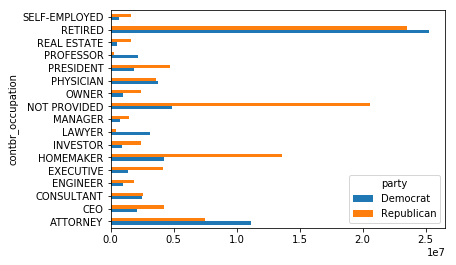

In [290]:
over_2mm.plot(kind='barh')  # barh表示水平柱状图
plt.show()
# 下图表示对各党派总出资额最高的职业

In [291]:
# 了解下对obama和Romney总出资额最高的职业和企业
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    
    # 根据key对totals进行降序排列 
#     sort_values(inplace=True)
    return totals.sort_values(ascending=False)[:n]

grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [292]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [293]:
# 对出资额分组
# 利用cut函数根据出资额的大小将数据离散化到多个面元中

bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [294]:
# 根据候选人姓名和面元标签对数据进行分组
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

#可以看出，在小额资助方面，Obama获得的数量比较多

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [295]:
# 还可以对出资额求和并在面元内规格化，以便图形化显示两位候选人各种资助额度的比例
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [296]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


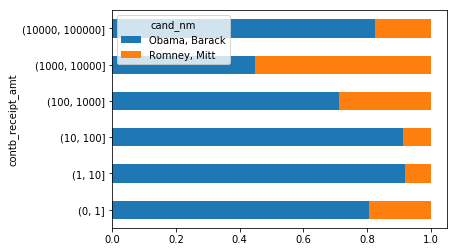

In [297]:
normed_sums[:-2].plot(kind='barh', stacked=True)
# 加上stacked=True，就是堆积柱状图了

plt.show()  # 两位候选人收到的各种捐赠额度的总额比例

In [298]:
# 根据州统计赞助信息

# 首先肯定是根据候选人和州对数据进行聚合
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [299]:
# 如果对各行除以总赞助额，就会得到各候选人在各州的总赞助额比例：
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
